In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

#Fit the StandardScaler instance with the data:
scaler.fit(market_data_df)

#Scale the features in the market_data_df using the transform function:
market_data_scaled = scaler.transform(market_data_df)


In [5]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(data=market_data_scaled, columns=market_data_df.columns)
# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index
# Set the coinid column as index
scaled_df = scaled_df.set_index('coin_id')

# Display sample data
display(scaled_df)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 12))
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
display(df_elbow)


c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: 

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


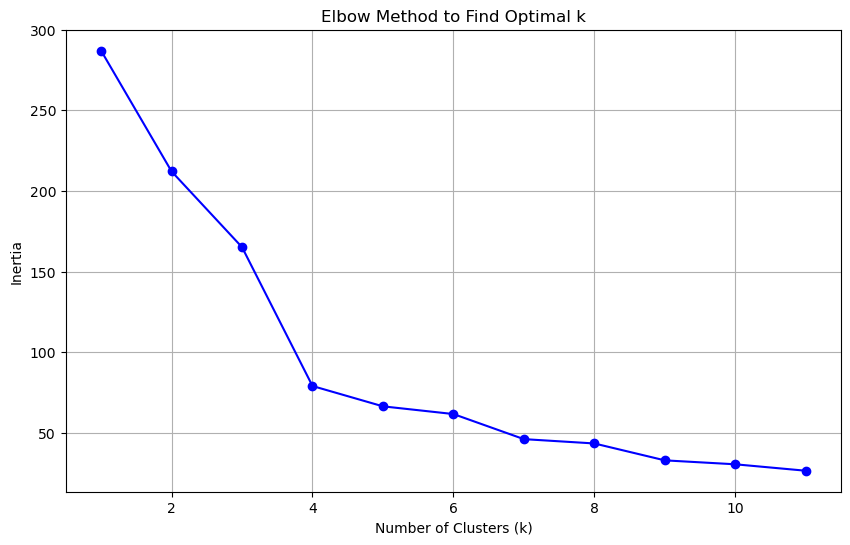

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(k, inertia, marker='o', color='b', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** the best value for `k` is 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
# Initialize the K-Means model with k=4
kmeans_model = KMeans(n_clusters=4, random_state=42)


In [9]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_df)

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values.
cluster_labels

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [11]:
# Create a copy of the DataFrame
df_copy = scaled_df.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['Cluster'] = cluster_labels

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

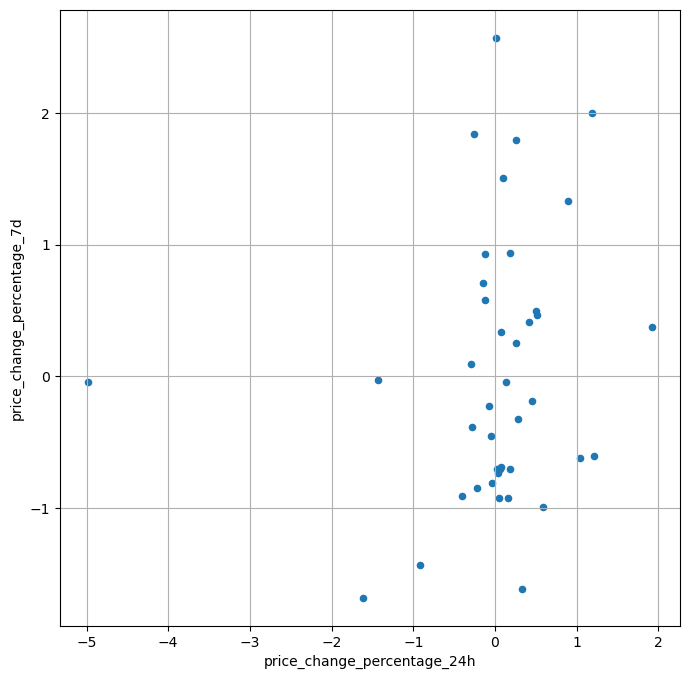

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
df_copy.plot(kind="scatter", x="price_change_percentage_24h", y="price_change_percentage_7d", grid=True,cmap='rainbow', figsize=(8,8))

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
customers_pca = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
customers_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [16]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {variance:.4f}")

Explained Variance Ratio for each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Explained Variance Ratio for each Principal Component:
PC1: 0.3720, PC2: 0.3470, PC3: 0.1760

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

pca_df = pd.DataFrame(data=customers_pca, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_df = pca_df.set_index('coin_id')

# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [18]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))



# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df




c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: 

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


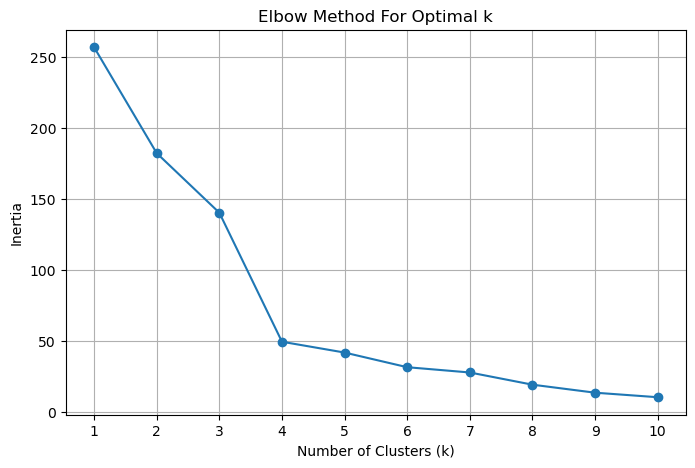

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(k, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k)  # Ensure all k-values are displayed on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [20]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [21]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

c:\Users\ryand\anaconda3\envs\class_env\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [22]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.predict(pca_df)


# Print the resulting array of cluster values.
cluster_labels

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [23]:
# Create a copy of the DataFrame with the PCA data
df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
df_copy['Cluster'] = cluster_labels


# Display sample data
df_copy.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PC1', ylabel='PC2'>

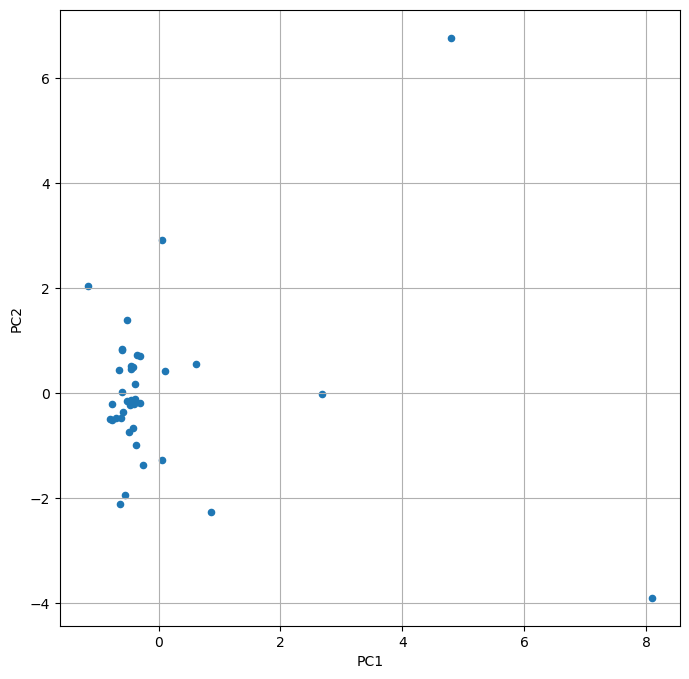

In [24]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
df_copy.plot(kind="scatter", x="PC1", y="PC2", grid=True,figsize=(8,8))

### Determine the Weights of Each Feature on each Principal Component

In [46]:
# Use the columns from the original scaled DataFrame as the index.
df_copy.set_index([
    scaled_df['price_change_percentage_24h'], 
    scaled_df['price_change_percentage_7d'], 
    scaled_df['price_change_percentage_14d'], 
    scaled_df['price_change_percentage_30d'], 
    scaled_df['price_change_percentage_60d'], 
    scaled_df['price_change_percentage_200d'], 
    scaled_df['price_change_percentage_1y']
], inplace=True)

df_copy



,,,,,,,PC1,PC2,PC3,Cluster
price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,,,,
0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,-0.600667,0.842760,0.461595,2
0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,-0.458261,0.458466,0.952877,2
0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,-0.433070,-0.168126,-0.641752,0
-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,-0.471835,-0.222660,-0.479053,0
1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,-1.157800,2.041209,1.859715,2
0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,-0.516534,1.388377,0.804071,2
0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,-0.450711,0.517699,2.846143,2
0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,-0.345600,0.729439,1.478013,2
0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,-0.649468,0.432165,0.600303,2


In [47]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.columns)

# Display the loadings
print(loadings)

                                   PC1       PC2       PC3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**  strongest negative influence is ‘price_change_percentage_24h’ and the feature with the strongest positive influence is ‘price_change_percentage_7d
    